In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
employment = pd.read_csv('SYB63_200_202009_Employment.csv')
labor_force = pd.read_csv('SYB63_329_202009_Labour Force and Unemployment.csv')

In [3]:
#Clean header of employment datasets
header1 = employment.iloc[0]
employment = employment[1:]
employment.columns = header1

In [4]:
#Rename columns in employment dataset
employment.rename(columns={'Region/Country/Area':'Code',np.nan:'Region/Country'}, inplace=True)

In [5]:
#To split series column
employment['Series'] = employment['Series'].apply(lambda x: x.split(':')[1])

In [6]:
#Clean header of labor_force dataset
header2 = labor_force.iloc[0]
labor_force = labor_force[1:]
labor_force.columns = header2

In [7]:
#Rename columns in labor force dataset
labor_force.rename(columns={'Region/Country/Area':'Code', np.nan:'Region/Country'}, inplace=True)

In [8]:
#To concatenate employment and labor_force datasets
dataset = pd.concat([employment, labor_force])

In [9]:
#To remove unnecessary columns
dataset = dataset[['Code','Region/Country','Series','Year','Value']]

In [10]:
#Convert value column to float
dataset['Value'] = dataset['Value'].astype(float)
dataset['Series'] = dataset['Series'].astype(str)

#Remove unnecessary space in Series column
dataset['Series'] = dataset['Series'].str.strip()

In [11]:
#dataset for asian countries
asian = dataset.loc[dataset['Region/Country'].str.contains('asia',case=False)]

In [12]:
df1 = asian[(asian['Year']=='2020') & ((asian['Series']=='Labour force participation - Total') | (asian['Series']=='Unemployment rate - Total'))]

In [13]:
df2 =asian[(asian['Year']=='2020') & 
           ((asian['Series']=='Agriculture (%) Male and Female')|
            (asian['Series']=='Industry (%) Male and Female')|
            (asian['Series']=='Services (%) Male and Female')
           )]

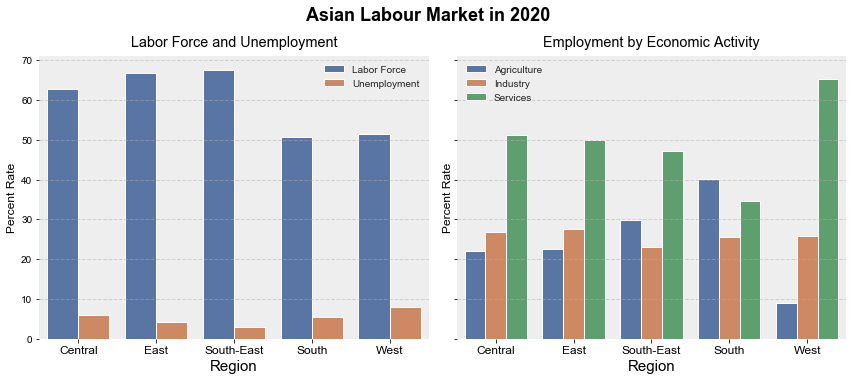

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,5), sharey='row')
fig.suptitle('Asian Labour Market in 2020', position=(0.5,1.05), fontsize=18, fontweight='bold')
sns.set_style('whitegrid')
sns.despine(left=True, bottom=True)

sns.barplot(x='Region/Country', y='Value', hue='Series', ci=None, palette='deep', data=df1, ax=ax[0])
ax[0].set_title('Labor Force and Unemployment')
ax[0].set_xlabel('Region', fontsize=15)
ax[0].set_ylabel('Percent Rate')
ax[0].set_xticks([0,1,2,3,4])
ax[0].set_xticklabels(['Central', 'East', 'South-East', 'South', 'West'], fontsize=12)
ax[0].legend(['Labor Force', 'Unemployment'], loc=0, frameon=False)

sns.barplot(x='Region/Country', y='Value', hue='Series', ci=None, palette='deep', data=df2, ax=ax[1])
ax[1].set_title('Employment by Economic Activity')
ax[1].set_xlabel('Region', fontsize=15)
ax[1].set_ylabel('Percent Rate')
ax[1].set_xticks([0,1,2,3,4])
ax[1].set_xticklabels(['Central', 'East', 'South-East', 'South', 'West'], fontsize=12)
ax[1].legend(['Agriculture','Industry', 'Services'], loc=0, frameon=False)

fig.tight_layout()